### Importación de datos



In [34]:
import pandas as pd # importacion de libreria de pandas para el analisis de datos
import matplotlib.pyplot as plt # importacion de libreria matplotlib para visualizar graficos

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [35]:


# Diccionario para almacenar los ingresos por tienda
ingresos_por_tienda = {}

# Analizar cada tienda
for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    # Calcular el ingreso total (Precio * Cantidad)
    # Asumiendo que cada fila representa una venta de 1 unidad
    ingreso_total = tienda['Precio'].sum()
    
    # Almacenar el resultado
    ingresos_por_tienda[f'Tienda {i}'] = ingreso_total

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Tienda': list(ingresos_por_tienda.keys()),
    'Ingreso Total': list(ingresos_por_tienda.values())
})

# Formatear los valores para mostrar todos los dígitos
resultados['Ingreso Total'] = resultados['Ingreso Total'].apply(lambda x: '{:,.0f}'.format(x))

# Imprimir los resultados con formato
print("\nIngresos totales por tienda:\n")
print(resultados.to_string(index=False))

ingresos_numericos = ingresos_por_tienda

# Encontrar la tienda con menor ingreso
tienda_menor_ingreso = min(ingresos_numericos.items(), key=lambda x: x[1])
print("=======================================================================")
print(f"La tienda con menor ingreso total es {tienda_menor_ingreso[0]} con ${tienda_menor_ingreso[1]:,.0f} COP")
print("=======================================================================")



Ingresos totales por tienda:

  Tienda Ingreso Total
Tienda 1 1,150,880,400
Tienda 2 1,116,343,500
Tienda 3 1,098,019,600
Tienda 4 1,038,375,700
La tienda con menor ingreso total es Tienda 4 con $1,038,375,700 COP


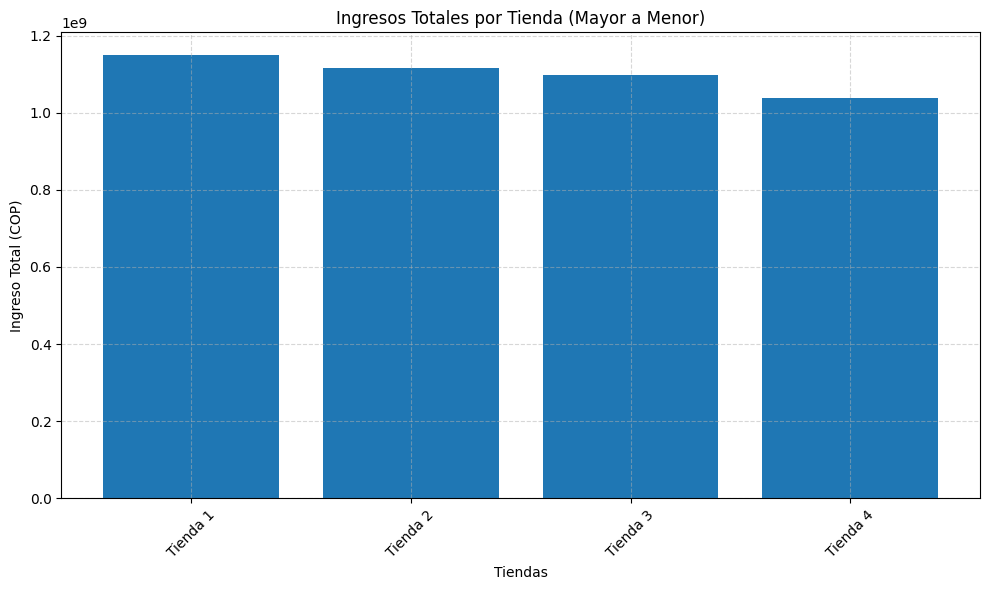

In [ ]:
# Ordenar resultados por ingreso total de mayor a menor
resultados_ordenados = resultados.copy()
resultados_ordenados['Ingreso Total'] = resultados_ordenados['Ingreso Total'].str.replace(',','').astype(float)
resultados_ordenados = resultados_ordenados.sort_values('Ingreso Total', ascending=False)
resultados_ordenados['Ingreso Total'] = resultados_ordenados['Ingreso Total'].apply(lambda x: '{:,.0f}'.format(x))

# Crear gráfico de barras ordenado
plt.figure(figsize=(10, 6))
plt.bar(resultados_ordenados['Tienda'], resultados_ordenados['Ingreso Total'].astype(float))
plt.title('Ingresos Totales por Tienda (Mayor a Menor)')
plt.xlabel('Tiendas')
plt.ylabel('Ingreso Total (COP)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()



C:\Users\Hp Pavilion\AppData\Local\Temp\ipykernel_20352\3929468864.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


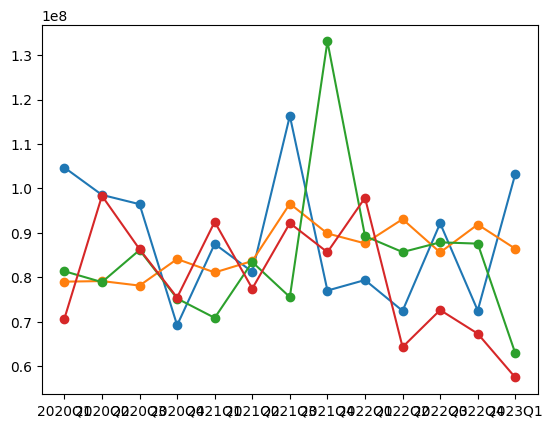

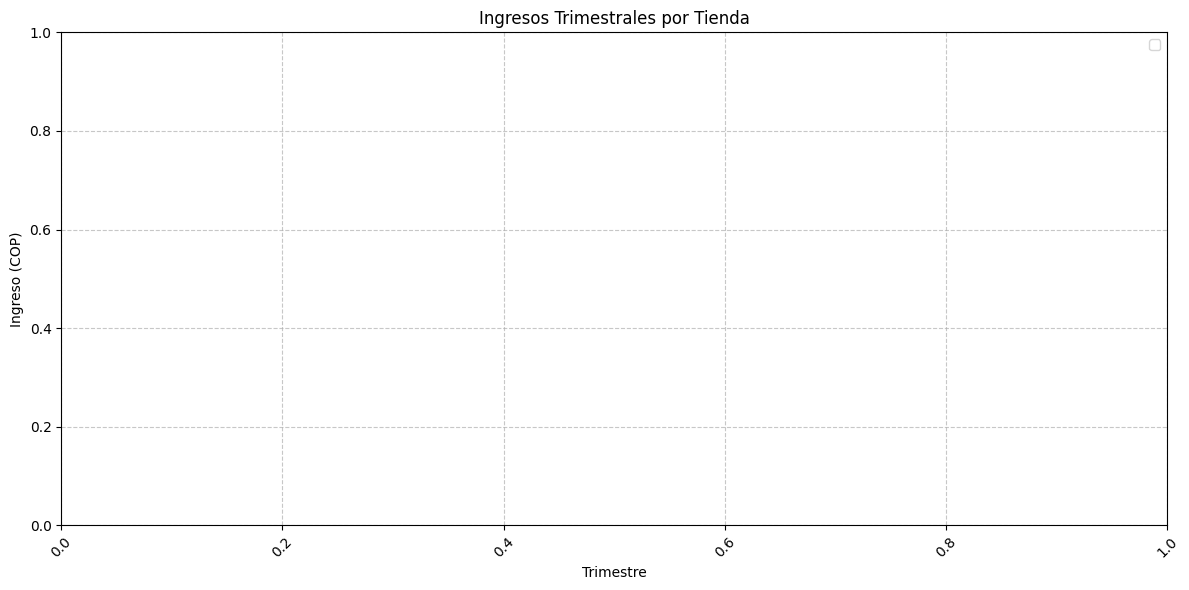

In [32]:
# Preparar datos para gráfico de ingresos mensuales
for i, tienda in enumerate([tienda1, tienda2, tienda3, tienda4 ],1):
    # Convertir la columna de fecha a datetime
    tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], format='%d/%m/%Y')
    
    # Crear columna de trimestre
    tienda['Trimestre'] = tienda['Fecha de Compra'].dt.to_period('Q')
    
    # Agrupar por trimestre y sumar los ingresos
    ingresos_trimestrales = tienda.groupby('Trimestre')['Precio'].sum().reset_index()
    ingresos_trimestrales['Trimestre'] = ingresos_trimestrales['Trimestre'].astype(str)
    
    # Graficar
    plt.plot(ingresos_trimestrales['Trimestre'], 
            ingresos_trimestrales['Precio'], 
            marker='o',
            label=f'Tienda {i}')

plt.figure(figsize=(12, 6))
plt.title('Ingresos Trimestrales por Tienda')
plt.xlabel('Trimestre')
plt.ylabel('Ingreso (COP)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
plt.close()


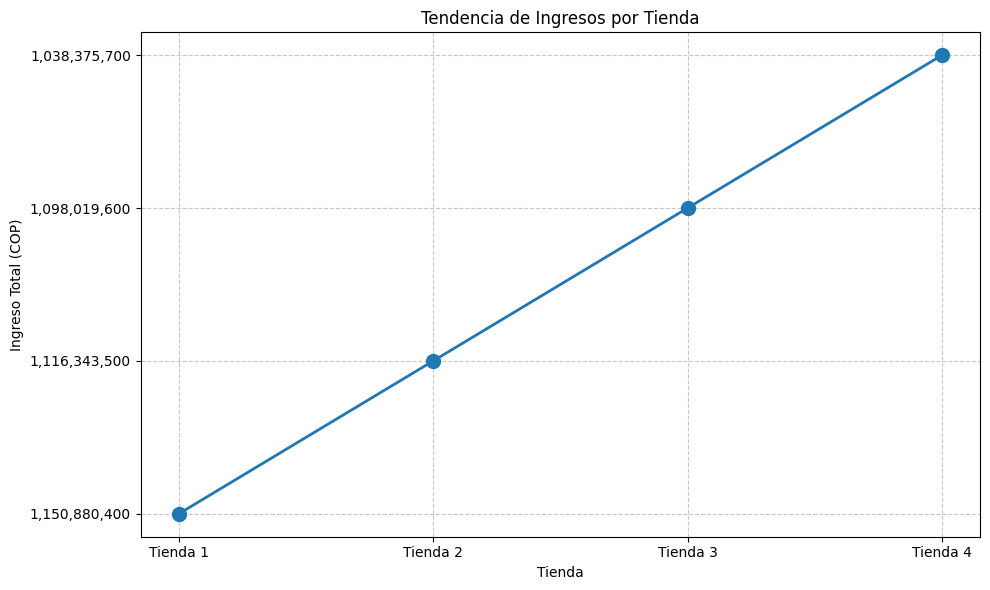

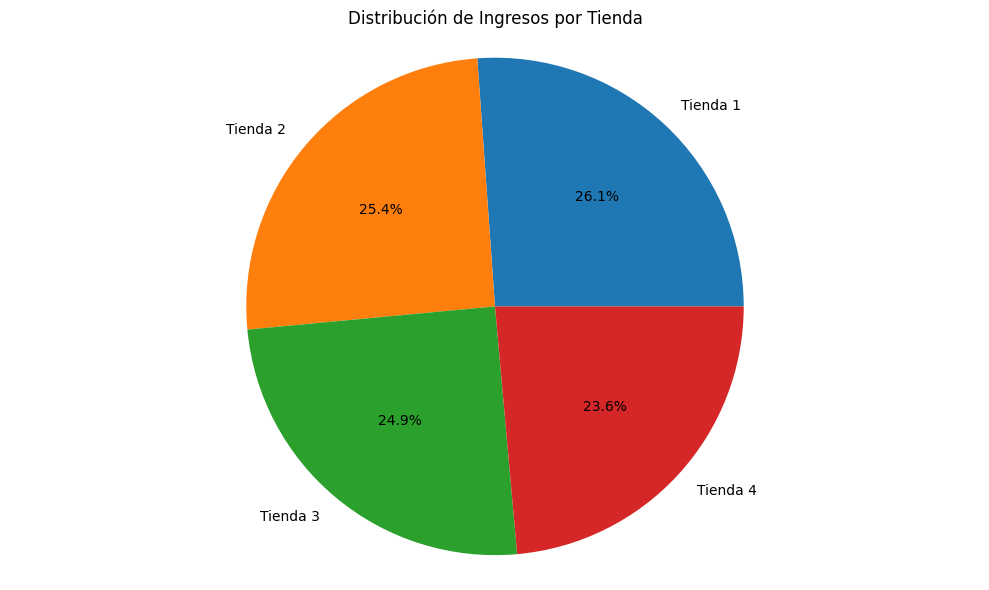

In [26]:
# Crear gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(resultados['Tienda'], resultados['Ingreso Total'], marker='o', linewidth=2, markersize=10)
plt.title('Tendencia de Ingresos por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total (COP)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()

# Crear gráfico circular (pie)
plt.figure(figsize=(10, 6))
plt.pie(ingresos_numericos.values(), labels=ingresos_numericos.keys(), autopct='%1.1f%%')
plt.title('Distribución de Ingresos por Tienda')
plt.axis('equal')
plt.tight_layout()
plt.show()
plt.close()

# 2. Ventas por categoría

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda